In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import infer_dtype

In [4]:
cards = pd.read_csv('cards.csv')

C:\Users\ellio\AppData\Local\Temp\ipykernel_15100\3310666353.py:1: DtypeWarning: Columns (3,7,12,16,20,23,25,26,30,31,32,33,35,39,40,41,47,52,53,61,62,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  cards = pd.read_csv('cards.csv')


In [5]:
cards.columns

Index(['artist', 'artistIds', 'asciiName', 'attractionLights', 'availability',
       'boosterTypes', 'borderColor', 'cardParts', 'colorIdentity',
       'colorIndicator', 'colors', 'defense', 'duelDeck', 'edhrecRank',
       'edhrecSaltiness', 'faceConvertedManaCost', 'faceFlavorName',
       'faceManaValue', 'faceName', 'finishes', 'flavorName', 'flavorText',
       'frameEffects', 'frameVersion', 'hand', 'hasAlternativeDeckLimit',
       'hasContentWarning', 'hasFoil', 'hasNonFoil', 'isAlternative',
       'isFullArt', 'isFunny', 'isOnlineOnly', 'isOversized', 'isPromo',
       'isRebalanced', 'isReprint', 'isReserved', 'isStarter',
       'isStorySpotlight', 'isTextless', 'isTimeshifted', 'keywords',
       'language', 'layout', 'leadershipSkills', 'life', 'loyalty', 'manaCost',
       'manaValue', 'name', 'number', 'originalPrintings',
       'originalReleaseDate', 'originalText', 'originalType', 'otherFaceIds',
       'power', 'printings', 'promoTypes', 'rarity', 'rebalancedPrint

In [6]:
relevant_types = cards[['borderColor', 'colors', 'keywords', 'manaCost', 'manaValue', 'name', 'power', 'printings', 'rarity','setCode', 'subtypes', 'supertypes', 'text', 'toughness', 'type', 'types']]
relevant_types.set_index('name')

,borderColor,colors,keywords,manaCost,manaValue,power,printings,rarity,setCode,subtypes,supertypes,text,toughness,type,types
name,,,,,,,,,,,,,,,
Ancestor's Chosen,black,W,First strike,{5}{W}{W},7.0,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature
Ancestor's Chosen,black,W,First strike,{5}{W}{W},7.0,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature
Angel of Mercy,black,W,Flying,{4}{W},5.0,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature
Angel of Mercy,black,W,Flying,{4}{W},5.0,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature
Angelic Blessing,black,W,NaN,{2}{W},3.0,NaN,"10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR",common,10E,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Into the Roil,black,U,Kicker,{1}{U},2.0,NaN,"C14, C17, C18, CMR, DDM, PS11, ZEN, ZNR",common,ZNR,NaN,NaN,Kicker {1}{U} (You may pay an additional {1}{U...,NaN,Instant,Instant
Bloodchief's Thirst,black,B,Kicker,{B},1.0,NaN,ZNR,uncommon,ZNR,NaN,NaN,Kicker {2}{B} (You may pay an additional {2}{B...,NaN,Sorcery,Sorcery
Roil Eruption,black,R,Kicker,{1}{R},2.0,NaN,ZNR,common,ZNR,NaN,NaN,Kicker {5} (You may pay an additional {5} as y...,NaN,Sorcery,Sorcery


In [7]:
relevant_types.isna().sum()
 # so adding some expert knowledge, 
 # colors na is going to be colorless cards
 # keywords na is fine some cards don't have keywords
 # manaCost NA most likely means the card is a land with no mana cost but we should check to make sure cards with suspend and 0 mana cost have proper mana values
 # power and toughness should have the same number of nas, because cards that don't have one can't have the other
 # sub and super types being NA is fine, some cards don't have those but all of them should have type and types
 # text NA should only be vanilla creatures and artifacts

borderColor        0
colors         18648
keywords       51654
manaCost       11266
manaValue          0
name               0
power          45265
printings          0
rarity             0
setCode            0
subtypes       33038
supertypes     71351
text            1087
toughness      45265
type               0
types              0
dtype: int64

In [8]:
relevant_types['colors'].value_counts()

colors
G                11781
B                11544
W                11512
R                11434
U                11227
U, W               909
G, W               885
B, U               859
G, R               855
B, R               852
G, U               785
R, W               746
B, W               745
R, U               738
B, G               735
B, R, U            294
B, U, W            224
G, R, W            208
G, U, W            189
B, G, R            188
B, G, R, U, W      180
R, U, W            142
B, R, W            130
B, G, W            121
B, G, U            121
G, R, U            110
B, G, U, W          21
G, R, U, W          18
W, G                17
U, B                13
U, R                12
U, G                12
W, R                12
W, U                11
R, G                 8
U, R, G              8
B, R, U, W           8
W, B                 7
B, G, R, U           7
B, G, R, W           6
Name: count, dtype: int64

In [9]:
infer_dtype(relevant_types['text'])

'string'

In [10]:
relevant_types.head()

,borderColor,colors,keywords,manaCost,manaValue,name,power,printings,rarity,setCode,subtypes,supertypes,text,toughness,type,types
0,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature
1,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature
2,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature
3,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature
4,black,W,NaN,{2}{W},3.0,Angelic Blessing,NaN,"10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR",common,10E,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery


In [11]:
relevant_types[(relevant_types['text'].isnull() == True)] #finding creatures with no text(aka with just power/toughness)

,borderColor,colors,keywords,manaCost,manaValue,name,power,printings,rarity,setCode,subtypes,supertypes,text,toughness,type,types
122,black,U,NaN,{U},1.0,Fugitive Wizard,1,"10E, 8ED, 9ED, LGN, M15",common,10E,"Human, Wizard",NaN,NaN,1,Creature — Human Wizard,Creature
125,black,U,NaN,{1}{U},2.0,Lumengrid Warden,1,"10E, 9ED, MRD",common,10E,"Human, Wizard",NaN,NaN,3,Creature — Human Wizard,Creature
192,black,B,NaN,{3}{B},4.0,Dross Crocodile,5,"10E, 5DN",common,10E,"Zombie, Crocodile",NaN,NaN,1,Creature — Zombie Crocodile,Creature
217,black,B,NaN,{3}{B}{B},5.0,Mass of Ghouls,5,"10E, FUT, TSR",common,10E,"Zombie, Warrior",NaN,NaN,3,Creature — Zombie Warrior,Creature
240,black,B,NaN,{2}{B},3.0,Scathe Zombies,2,"10E, 2ED, 30A, 3ED, 4BB, 4ED, 5ED, 6ED, 7ED, 8...",common,10E,Zombie,NaN,NaN,2,Creature — Zombie,Creature
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85609,black,G,NaN,{5}{G},6.0,Vastwood Gorger,5,"M12, M13, MB1, ORI, ZEN",common,ZEN,Wurm,NaN,NaN,6,Creature — Wurm,Creature
85624,black,NaN,NaN,{3},3.0,Stonework Puma,2,"DDP, ZEN",common,ZEN,"Cat, Ally",NaN,NaN,2,Artifact Creature — Cat Ally,"Artifact, Creature"
85868,black,W,NaN,{1}{W},2.0,Cliffhaven Sell-Sword,3,ZNR,common,ZNR,"Kor, Warrior",NaN,NaN,1,Creature — Kor Warrior,Creature
85984,black,B,NaN,{3}{B},4.0,Highborn Vampire,4,ZNR,common,ZNR,"Vampire, Warrior",NaN,NaN,3,Creature — Vampire Warrior,Creature


In [12]:
relevant_types['text'] = relevant_types['text'].fillna(value= "")

C:\Users\ellio\AppData\Local\Temp\ipykernel_15100\2366656548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_types['text'] = relevant_types['text'].fillna(value= "")


In [13]:
relevant_types.isna().sum()

borderColor        0
colors         18648
keywords       51654
manaCost       11266
manaValue          0
name               0
power          45265
printings          0
rarity             0
setCode            0
subtypes       33038
supertypes     71351
text               0
toughness      45265
type               0
types              0
dtype: int64

In [14]:
relevant_types.head()

,borderColor,colors,keywords,manaCost,manaValue,name,power,printings,rarity,setCode,subtypes,supertypes,text,toughness,type,types
0,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature
1,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature
2,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature
3,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature
4,black,W,NaN,{2}{W},3.0,Angelic Blessing,NaN,"10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR",common,10E,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery


In [15]:
#[CARDNAME] mask, when we feed our data to the machine learning model we don't want it to generate random or multiple names used willy nilly throughout the text, so we're going to let the user name the card and have the final output just replace cardname
relevant_types['CARDNAME'] = [relevant_types['text'][x].replace(relevant_types['name'][x], "[CARDNAME]") for x in range(0,len(relevant_types['text']))]

C:\Users\ellio\AppData\Local\Temp\ipykernel_15100\3385958689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_types['CARDNAME'] = [relevant_types['text'][x].replace(relevant_types['name'][x], "[CARDNAME]") for x in range(0,len(relevant_types['text']))]


In [13]:
relevant_types.head()

,borderColor,colors,keywords,manaCost,manaValue,name,power,printings,rarity,setCode,subtypes,supertypes,text,toughness,type,types,CARDNAME
0,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,First strike (This creature deals combat damag...
1,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,First strike (This creature deals combat damag...
2,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,Flying\nWhen [CARDNAME] enters the battlefield...
3,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,Flying\nWhen [CARDNAME] enters the battlefield...
4,black,W,NaN,{2}{W},3.0,Angelic Blessing,NaN,"10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR",common,10E,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery,Target creature gets +3/+3 and gains flying un...


In [16]:
relevant_types.colors.value_counts()

colors
G                11781
B                11544
W                11512
R                11434
U                11227
U, W               909
G, W               885
B, U               859
G, R               855
B, R               852
G, U               785
R, W               746
B, W               745
R, U               738
B, G               735
B, R, U            294
B, U, W            224
G, R, W            208
G, U, W            189
B, G, R            188
B, G, R, U, W      180
R, U, W            142
B, R, W            130
B, G, W            121
B, G, U            121
G, R, U            110
B, G, U, W          21
G, R, U, W          18
W, G                17
U, B                13
U, R                12
U, G                12
W, R                12
W, U                11
R, G                 8
U, R, G              8
B, R, U, W           8
W, B                 7
B, G, R, U           7
B, G, R, W           6
Name: count, dtype: int64

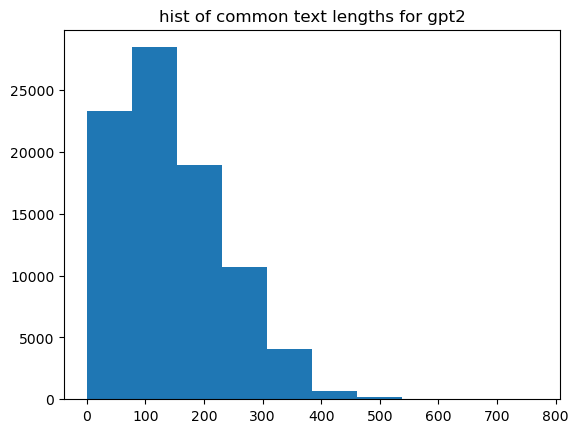

In [17]:
plt.hist([len(x) for x in relevant_types['CARDNAME']])
plt.title('hist of common text lengths for gpt2');

In [18]:
from statistics import mean, mode
mean([len(x) for x in relevant_types['CARDNAME']]), mode([len(x) for x in relevant_types['CARDNAME']]) #142, with 15 as the most commmon token length a 15 charachter card is probably something with 2 keywords for example flying, prowess 

(142.9943930863511, 15)

In [32]:
# I'm now going to prepare the text to feed to my Language model by giving it some more information.

def generate_text(color, manacost, types, type, text, iscreature = False, power = '', toughness = '',):
    if iscreature == False:
        return (f'This is a {color}, {types} magic card with manacost {manacost}. This is its rules text: {text}')
    if iscreature == True:
        return (f'This is a {color}, {type} magic card with manacost {manacost}, power {power}, and toughness {toughness}. This is its rules text: {text}')

In [17]:
def generate_prompt(color, manacost, types, type, iscreature = False, power = '', toughness = ''):
    if iscreature == False:
        return (f'Generate rules text for a magic the gathering card. Its color is {color}, its type is {types}, and its manacost is {manacost}.')
    if iscreature == True:
        return (f'Generate rules text for a {color}, {types} magic the gathering card with manacost {manacost}, power {power}, and toughness {toughness}.')

In [33]:
promp_list = []
for x in range(0, len(relevant_types['CARDNAME'])): 
    if 'Creature' in relevant_types.loc[x]['types']:
        promp_list.append(generate_text(color = relevant_types.loc[x]['colors'], manacost=relevant_types.loc[x]['manaCost'], types = relevant_types.loc[x]['types'],type = relevant_types.loc[x]['type']
              , text = relevant_types.loc[x]['CARDNAME'], iscreature = True, power = relevant_types.loc[x]['power'], toughness = relevant_types.loc[x]['toughness']))
    else:
        promp_list.append(generate_text(color = relevant_types.loc[x]['colors'], manacost=relevant_types.loc[x]['manaCost'], types = relevant_types.loc[x]['types'],type = relevant_types.loc[x]['type']
              , text = relevant_types.loc[x]['CARDNAME']))

In [31]:
promp_list[:10]

['This is a W, Creature — Human Cleric magic card with manacost {5}{W}{W}, power (4, and toughness 4. This is its rules text: First strike (This creature deals combat damage before creatures without first strike.)\\nWhen [CARDNAME] enters the battlefield, you gain 1 life for each card in your graveyard.',
 'This is a W, Creature — Human Cleric magic card with manacost {5}{W}{W}, power (4, and toughness 4. This is its rules text: First strike (This creature deals combat damage before creatures without first strike.)\\nWhen [CARDNAME] enters the battlefield, you gain 1 life for each card in your graveyard.',
 'This is a W, Creature — Angel magic card with manacost {4}{W}, power (3, and toughness 3. This is its rules text: Flying\\nWhen [CARDNAME] enters the battlefield, you gain 3 life.',
 'This is a W, Creature — Angel magic card with manacost {4}{W}, power (3, and toughness 3. This is its rules text: Flying\\nWhen [CARDNAME] enters the battlefield, you gain 3 life.',
 "This is a W, Sor

In [34]:
relevant_types['prompt'] = promp_list

C:\Users\ellio\AppData\Local\Temp\ipykernel_15100\1607348076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_types['prompt'] = promp_list


In [37]:
relevant_types['prompt'][1]

'This is a W, Creature — Human Cleric magic card with manacost {5}{W}{W}, power 4, and toughness 4. This is its rules text: First strike (This creature deals combat damage before creatures without first strike.)\\nWhen [CARDNAME] enters the battlefield, you gain 1 life for each card in your graveyard.'

In [38]:
relevant_types.head()

,borderColor,colors,keywords,manaCost,manaValue,name,power,printings,rarity,setCode,subtypes,supertypes,text,toughness,type,types,CARDNAME,prompt
0,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,First strike (This creature deals combat damag...,"This is a W, Creature — Human Cleric magic car..."
1,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,First strike (This creature deals combat damag...,"This is a W, Creature — Human Cleric magic car..."
2,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,Flying\nWhen [CARDNAME] enters the battlefield...,"This is a W, Creature — Angel magic card with ..."
3,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,Flying\nWhen [CARDNAME] enters the battlefield...,"This is a W, Creature — Angel magic card with ..."
4,black,W,NaN,{2}{W},3.0,Angelic Blessing,NaN,"10E, 9ED, EXO, P02, POR, PS11, S00, S99, TPR",common,10E,NaN,NaN,Target creature gets +3/+3 and gains flying un...,NaN,Sorcery,Sorcery,Target creature gets +3/+3 and gains flying un...,"This is a W, Sorcery magic card with manacost ..."


In [ ]:
#given initial model fine tuning it seems likely we should split the cardtypes and call a different saved model everytime for the card types, land, creature, instant, sorcery, planeswalker, artifact, enchantment

## MODEL ## 

In [19]:
from transformers import pipeline 
import tensorflow.python.keras.engine

In [20]:
from transformers import AutoModelForCausalLM, AutoTokenizer #playing with this     
import torch

torch_device = "cuda" if torch.cuda.is_available() else "cpu"

tokenizer = AutoTokenizer.from_pretrained("gpt2")

# add the EOS token as PAD tok|en to avoid warnings
model = AutoModelForCausalLM.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id).to(torch_device)

In [21]:

card_1 = generate_prompt(color = relevant_types.loc[1]['colors'], manacost=relevant_types.loc[1]['manaCost'], types = relevant_types.loc[1]['types'],type = relevant_types.loc[1]['type']
              , power= relevant_types.loc[1]['power'], toughness= relevant_types.loc[1]['toughness'], iscreature=True)

model_inputs = tokenizer(card_1, return_tensors='pt').to(torch_device)

# generate 40 new tokens
greedy_output = model.generate(**model_inputs, max_new_tokens=50)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True)) 

c:\Users\ellio\anaconda3\Lib\site-packages\transformers\generation\utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(


Output:
----------------------------------------------------------------------------------------------------
Generate rules text for a W, Creature magic the gathering card with manacost {5}{W}{W}, power 4, and toughness 4.

If you cast a spell with the name "Wizard of the Coast," you may pay {W}{W}, remove a card from your hand, then put it into your graveyard.

If you cast a spell with the name "


# interpretation # 
So there are two problems with this card one it's rules text doesn't make sense, two it's producing multiple "if you cast" options, you can only cast a spell once if you were able to do multiple things when you cast it the formattting should be:
if you cast this/a spell: do A, do B
not 
if you cast this/a spell: do A
if you cast this/a spell: do A

Code source moved to google collab https://gist.github.com/MattPitlyk/45541145ad48b93da395f0a72ec2e7dc

## reutrning after practice ##
So, instead of making 1 text file we're going to make a couple splits down card type for creature, instant/sorcery, enchantment, artifact, and land. Then we're going to feed that to a couple seperate models and compare how multiple models do against the original in google collab.

In [3]:
import gpt_2_simple as gpt2 #we're only gonna run this once then it's saved learned that the hard way.
#gpt2.download_gpt2(model_name="124M")

Fetching checkpoint: 1.05Mit [00:00, ?it/s]                                                         
Fetching encoder.json: 1.05Mit [00:00, 1.96Mit/s]                                                   
Fetching hparams.json: 1.05Mit [00:00, ?it/s]                                                       
Fetching model.ckpt.data-00000-of-00001: 498Mit [04:23, 1.89Mit/s]                                  
Fetching model.ckpt.index: 1.05Mit [00:00, 9.07Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:00, 4.40Mit/s]                                                
Fetching vocab.bpe: 1.05Mit [00:00, 3.87Mit/s]                                                      


In [42]:
relevant_types['types'].unique()

array(['Creature', 'Sorcery', 'Enchantment', 'Instant', 'Artifact',
       'Artifact, Creature', 'Land', 'Tribal, Enchantment',
       'Tribal, Instant', 'Planeswalker', 'Enchantment, Creature',
       'Artifact, Land', 'Enchantment, Artifact', 'Tribal, Sorcery',
       'Vanguard', 'Instant, Creature', 'Summon', 'Summon, Wolf',
       'Elemental, Instant', 'Enchantment, Land', 'Land, Creature',
       'Conspiracy', 'Tribal, Artifact', 'Plane', 'Phenomenon', 'Battle',
       'Scheme', 'Summon, Jaguar', 'Summon, Dragon', 'Summon, Goblin',
       'Summon, Knights', 'Summon, Legend', 'Universewalker', 'Stickers',
       'Hero', 'Hero, Artifact', "Scariest, Creature, You'll, Ever, See",
       'Artifact, Enchantment', 'Eaturecray', 'instant',
       'Instant, Adventure'], dtype=object)

In [57]:
text_fine_tune = [x for x in relevant_types['prompt']]
creature_fine_tune = [x for x in relevant_types[(relevant_types['types'] == 'Creature')]['prompt']]
spell_fine_tune = [x for x in relevant_types[(relevant_types['types'] == 'Sorcery') | (relevant_types['types'] == 'Instant')]['prompt']]
artifact_fine_tune = [x for x in relevant_types[(relevant_types['types'] == 'Artifact')]['prompt']]
enchantment_fine_tune = [x for x in relevant_types[(relevant_types['types'] == 'Enchantment')]['prompt']]
land_fine_tune = [x for x in relevant_types[(relevant_types['types'] == 'Land')]['prompt']]

In [59]:
land_fine_tune[:10]

['This is a nan, Land magic card with manacost nan. This is its rules text: {T}: Add {C}.\\n{T}: Add {W} or {U}. [CARDNAME] deals 1 damage to you.',
 'This is a nan, Land magic card with manacost nan. This is its rules text: {T}: Add {C}.\\n{T}: Add {R} or {W}. [CARDNAME] deals 1 damage to you.',
 'This is a nan, Land magic card with manacost nan. This is its rules text: {T}: Add {C}.\\n{T}: Add {G} or {W}. [CARDNAME] deals 1 damage to you.',
 'This is a nan, Land magic card with manacost nan. This is its rules text: {T}: Add {C}.\\n{T}: Add {W} or {B}. [CARDNAME] deals 1 damage to you.',
 "This is a nan, Land magic card with manacost nan. This is its rules text: [CARDNAME] enters the battlefield tapped.\\n{T}: Add {U}.\\n{1}{U}: [CARDNAME] becomes a 2/1 blue Faerie creature with flying until end of turn. It's still a land.",
 "This is a nan, Land magic card with manacost nan. This is its rules text: [CARDNAME] enters the battlefield tapped.\\n{T}: Add {U}.\\n{1}{U}: [CARDNAME] becomes

In [40]:
creature_fine_tune[:10]

["This is a B, Creature magic card with manacost {3}{B}, power *, and toughness *. This is its rules text: Trample\\nAs [CARDNAME] enters the battlefield, pay any amount of life. The amount you pay can't be more than the total number of white nontoken permanents your opponents control plus the total number of white cards in their graveyards.\\n[CARDNAME]'s power and toughness are each equal to the life paid as it entered the battlefield."]

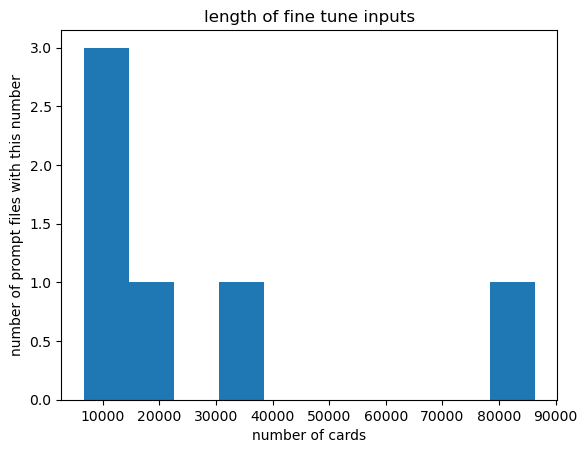

In [50]:
plt.hist([(len(text_fine_tune), len(creature_fine_tune), len(spell_fine_tune), len(artifact_fine_tune), len(enchantment_fine_tune), len(land_fine_tune))])
plt.title('length of fine tune inputs')
plt.xlabel('number of cards')
plt.ylabel('number of prompt files with this number');

In [58]:
#make a txt file for gpt to use https://pynative.com/python-write-list-to-file/
# make file with all cards
with open(r'text_fine_tune.txt', 'w') as fp:
    for item in text_fine_tune:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [52]:
#make file with creatures
with open(r'creature_fine_tune.txt', 'w') as fp:
    for item in creature_fine_tune:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [53]:
#make file with spells
with open(r'spells_fine_tune.txt', 'w') as fp:
    for item in spell_fine_tune:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [54]:
#make file with artifacts
with open(r'artifact_fine_tune.txt', 'w') as fp:
    for item in artifact_fine_tune:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [55]:
#make file with enchantments
with open(r'enchantment_fine_tune.txt', 'w') as fp:
    for item in enchantment_fine_tune:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')

Done


In [56]:
#make file with creatures
with open(r'land_fine_tune.txt', 'w') as fp:
    for item in land_fine_tune:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')


Done


## now we'll upload those text files to google drive so we can mount them with the pictures and have our model access them ##

In [ ]:
#moved to goole collab for GPU/TPU
#sess = gpt2.start_tf_sess()

#gpt2.finetune(sess, 'text_fine_tune.txt', steps=200, model_name='124M', only_train_transformer_layers=True) 

## checking model accuracies with basic NLP ##

In [179]:
all_cards_df = pd.read_csv('all_cards.csv')
artifact_cards_df = pd.read_csv('artifact_cards.csv')
creature_cards_df = pd.read_csv('creature_cards.csv')
enchantment_cards_df = pd.read_csv('enchantment_cards.csv')
land_cards_df = pd.read_csv('land_cards.csv')
spell_cards_df = pd.read_csv('spell_cards.csv')

In [180]:
etb_prompts = relevant_types.loc[(relevant_types['CARDNAME'].str).contains('enters the battlefield')]

In [181]:
etb_prompts.head()

,borderColor,colors,keywords,manaCost,manaValue,name,power,printings,rarity,setCode,subtypes,supertypes,text,toughness,type,types,CARDNAME,prompt
0,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,First strike (This creature deals combat damag...,"This is a W, Creature — Human Cleric magic car..."
1,black,W,First strike,{5}{W}{W},7.0,Ancestor's Chosen,4,"10E, JUD, UMA",uncommon,10E,"Human, Cleric",NaN,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,First strike (This creature deals combat damag...,"This is a W, Creature — Human Cleric magic car..."
2,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,Flying\nWhen [CARDNAME] enters the battlefield...,"This is a W, Creature — Angel magic card with ..."
3,black,W,Flying,{4}{W},5.0,Angel of Mercy,3,"10E, 8ED, 9ED, DDC, DVD, IMA, INV, JMP, MB1, P...",uncommon,10E,Angel,NaN,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,Flying\nWhen [CARDNAME] enters the battlefield...,"This is a W, Creature — Angel magic card with ..."
6,black,W,NaN,{3}{W}{W},5.0,Angelic Chorus,NaN,"10E, BBD, USG",rare,10E,NaN,NaN,Whenever a creature enters the battlefield und...,NaN,Enchantment,Enchantment,Whenever a creature enters the battlefield und...,"This is a W, Enchantment magic card with manac..."


In [182]:
import random
all_cards_df['random real cards'] = random.sample([x for x in etb_prompts['CARDNAME']], 100)
all_cards_df.head()

,Unnamed: 0,generated_text,random real cards
0,0,"When [CARDNAME] enters the battlefield, it dea...","As [CARDNAME] enters the battlefield, choose a..."
1,1,"When [CARDNAME] enters the battlefield, you ma...","When [CARDNAME] enters the battlefield, exile ..."
2,2,"When [CARDNAME] enters the battlefield, exile ...",Improvise (Your artifacts can help cast this s...
3,3,"When [CARDNAME] enters the battlefield, it dea...",[CARDNAME] enters the battlefield tapped.\n{T}...
4,4,"When [CARDNAME] enters the battlefield, it dea...",Prowess (Whenever you cast a noncreature spell...


In [183]:
artifact_cards_df['random real cards'] = random.sample([x for x in etb_prompts[(etb_prompts['types'] == 'Artifact')]['CARDNAME']], 100)
creature_cards_df['random real cards'] = random.sample([x for x in etb_prompts[(etb_prompts['types'] == 'Creature')]['CARDNAME']], 100)
enchantment_cards_df['random real cards'] = random.sample([x for x in etb_prompts[(etb_prompts['types'] == 'Enchantment')]['CARDNAME']], 100)
land_cards_df['random real cards'] = random.sample([x for x in relevant_types[(relevant_types['types'] == 'Land')]['prompt']], 100)
spell_cards_df['random real cards'] = random.sample([x for x in relevant_types[(relevant_types['types'] == 'Instant') | (relevant_types['types'] == 'Sorcery') ]['CARDNAME']], 100)

In [184]:
artifact_cards_df['generated_text'][0]

'When [CARDNAME] enters the battlefield, exile it."]\nThis is a nan, Artifact magic card with manacost {3}. This is its rules text: {2}, {T}: Exile target card from your graveyard. Draw a card at the beginning of the next turn\'s upkeep.\nThis is a nan, Artifact magic card with manacost {1}. This is its rules text: {1}, {T}: Target creature gets +1/-1 until end of turn.\nThis is a nan, Artifact'

In [185]:
land_cards_df['generated_text'][0]

'{T}.)\nThis is a nan, Land magic card with manacost nan. This is its rules text: ({T}: Add {W}.)\nThis is a nan, Land magic card with manacost nan. This is its rules text: ({T}: Add {U}.)\nThis is a nan, Land magic card with manacost nan. This is its rules text: ({T}: Add {U}.)\nThis is a nan, Land magic card with manac'

In [186]:
#splitting up the gpt prompts
all_cards_df['generated_text'] = [x.split('\n')[0] for x in all_cards_df['generated_text']]
artifact_cards_df['generated_text'] = [x.split('\n')[0] for x in artifact_cards_df['generated_text']]
creature_cards_df['generated_text'] = [x.split('\n')[0] for x in creature_cards_df['generated_text']]
enchantment_cards_df['generated_text'] = [x.split('\n')[0] for x in enchantment_cards_df['generated_text']]
land_cards_df['generated_text'] = [x.split('\n')[1] for x in land_cards_df['generated_text']]
spell_cards_df['generated_text'] = [x.split('\n')[0] for x in spell_cards_df['generated_text']]

In [187]:
artifact_cards_df['generated_text'][0]

'When [CARDNAME] enters the battlefield, exile it."]'

In [188]:
#setting up and stacking all columns for 1 dataframe 
class_column = [0 for x in range (0,100)]
class_column.extend([1 for x in range(0,100)])
len(class_column)

200

In [189]:
all_cards_column = [x for x in all_cards_df['generated_text']]
all_cards_column.extend(x for x in all_cards_df['random real cards'])
len(all_cards_column)

200

In [190]:
creature_cards_column = [x for x in creature_cards_df['generated_text']]
creature_cards_column.extend(x for x in creature_cards_df['random real cards'])
len(creature_cards_column)

200

In [191]:
artifact_cards_column = [x for x in artifact_cards_df['generated_text']]
artifact_cards_column.extend(x for x in artifact_cards_df['random real cards'])
len(artifact_cards_column)

200

In [192]:
enchantment_cards_column = [x for x in enchantment_cards_df['generated_text']]
enchantment_cards_column.extend(x for x in enchantment_cards_df['random real cards'])
len(enchantment_cards_column)

200

In [193]:
lands_cards_column = [x for x in land_cards_df['generated_text']]
lands_cards_column.extend(x for x in land_cards_df['random real cards'])
len(lands_cards_column)

200

In [194]:
spells_cards_column = [x for x in spell_cards_df['generated_text']]
spells_cards_column.extend(x for x in spell_cards_df['random real cards'])
len(spells_cards_column)

200

In [195]:
nlp_df = pd.DataFrame({'All cards' : all_cards_column, 'Artifacts' : artifact_cards_column, 'Creatures' : creature_cards_column, 'enchantments' : enchantment_cards_column, 'lands' : lands_cards_column, 'spells' : spells_cards_column , 'class [0(gpt), 1(real)]' : class_column})
nlp_df.head()

,All cards,Artifacts,Creatures,enchantments,lands,spells,"class [0(gpt), 1(real)]"
0,"When [CARDNAME] enters the battlefield, it dea...","When [CARDNAME] enters the battlefield, exile ...","When [CARDNAME] enters the battlefield, it dea...","When [CARDNAME] enters the battlefield, you be...","This is a nan, Land magic card with manacost n...","This is a R, Sorcery magic card with manacost ...",0
1,"When [CARDNAME] enters the battlefield, you ma...","When [CARDNAME] enters the battlefield, draw a...","When [CARDNAME] enters the battlefield, exile ...","When [CARDNAME] enters the battlefield, you ma...","This is a nan, Land magic card with manacost n...",A man who has been shot in the back by a man w...,0
2,"When [CARDNAME] enters the battlefield, exile ...","When [CARDNAME] enters the battlefield, exile ...","When [CARDNAME] enters the battlefield, it dea...","When [CARDNAME] enters the battlefield, exile ...","This is a nan, Land magic card with manacost n...","TIP: If you've been playing Magic for a while,...",0
3,"When [CARDNAME] enters the battlefield, it dea...","When [CARDNAME] enters the battlefield, draw t...","When [CARDNAME] enters the battlefield, exile ...","When [CARDNAME] enters the battlefield, exile ...","This is a nan, Land magic card with manacost n...","This is a R, Sorcery magic card with manacost ...",0
4,"When [CARDNAME] enters the battlefield, it dea...","When [CARDNAME] enters the battlefield, draw t...","When [CARDNAME] enters the battlefield, exile it.","When [CARDNAME] enters the battlefield, it dea...","This is a nan, Land magic card with manacost n...","This is a R, Sorcery magic card with manacost ...",0


Now I'm just going to to some basic countvectorizor classification, the baseline is .5 and we actually want our models to be Close to that since if our text generator is good, the model shouldn't be able to tell the difference between a real card and a fake card.

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords 
from sklearn.model_selection import cross_val_score


In [198]:
X = nlp_df['All cards']
X1 = nlp_df['Artifacts']
X2 = nlp_df['Creatures']
X3 = nlp_df['enchantments']
X4 = nlp_df['lands']
X5 = nlp_df['spells']
y = nlp_df['class [0(gpt), 1(real)]']


In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size=0.2,stratify=y,random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.2,stratify=y,random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y,test_size=0.2,stratify=y,random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y,test_size=0.2,stratify=y,random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5,y,test_size=0.2,stratify=y,random_state=42)

In [201]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('lr', LogisticRegression(max_iter = 10000))
])

nlkt_stop = stopwords.words('english')
                            
pipe_params = {
'cvec__max_features' : [100,500, 1000],
'cvec__ngram_range' : [(1,1), (1,2)],
'cvec__stop_words' : ['english', None, nlkt_stop]
}

gs = GridSearchCV(pipe, pipe_params, cv = 5)
gs1 = GridSearchCV(pipe, pipe_params, cv = 5)
gs2 = GridSearchCV(pipe, pipe_params, cv = 5)
gs3 = GridSearchCV(pipe, pipe_params, cv = 5)
gs4 = GridSearchCV(pipe, pipe_params, cv = 5)
gs5 = GridSearchCV(pipe, pipe_params, cv = 5)

In [202]:
gs.fit(X_train,y_train)
gs1.fit(X1_train,y1_train)
gs2.fit(X2_train,y2_train)
gs3.fit(X3_train,y3_train)
gs4.fit(X4_train,y4_train)
gs5.fit(X5_train,y5_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('lr',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'cvec__max_features': [100, 500, 1000],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english', None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]]})

In [204]:
print(" all_cards ", gs.best_score_ , " artifacts ", gs1.best_score_, ' creatures ', gs2.best_score_, ' enchantments ', gs3.best_score_, 'lands ', gs4.best_score_, ' spells ', gs5.best_score_)

 all_cards  0.85625  artifacts  0.9  creatures  0.9125  enchantments  0.89375 lands  0.69375  spells  0.9125


In [205]:
print(" all_cards ", gs.score(X_test,y_test) , " artifacts ", gs1.score(X1_test,y1_test) , ' creatures ', gs.score(X2_test,y2_test) , ' enchantments ', gs3.score(X3_test,y3_test) , 'lands ', gs4.score(X4_test,y4_test) , ' spells ', gs5.score(X5_test,y5_test) )

 all_cards  0.825  artifacts  0.925  creatures  0.775  enchantments  0.85 lands  0.75  spells  0.875


Text(0.5, 1.0, 'gpt-2 fine tuning accuracy by card type')

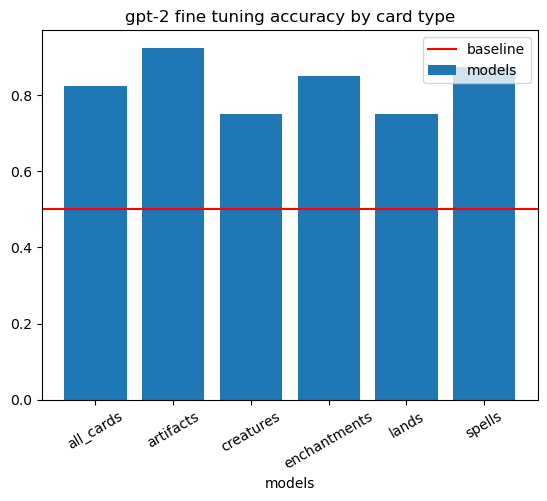

In [220]:
plt.bar(['all_cards', 'artifacts', 'creatures', 'enchantments' ,'lands', 'spells'], [gs.score(X_test,y_test), gs1.score(X1_test,y1_test), gs2.score(X2_test,y2_test), gs3.score(X3_test,y3_test), gs4.score(X4_test,y4_test),gs5.score(X5_test,y5_test)])
plt.xlabel("models")
plt.xticks(rotation = 30)
plt.axhline(y=.5, color = 'r')

plt.legend(['baseline', 'models'])
plt.title('gpt-2 fine tuning accuracy by card type')

## Interpretation ##
Allrighty not so bad, for most of these the nlp is good enough to catch the bad prompt, however lands spells and all_cards are pretty about 2/5s and halfway to our 50% goal, lands had a specific different input prompt relative to the others {T}, so that's probably a good sign that different input helps. Remember we want our score to be as low as possible by changing the input side, leaving the actual classifier do the best it can to guess which are our fake cards.